In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy

In [3]:
Hubble_h = 0.73
BoxSize = 62.5

In [4]:
directory1 = '../src/auxdata/trees/mini-millennium/'
directory2 = '../src/auxdata/trees/modified-mini/'
directory3 = '../src/auxdata/trees/modified-mini-2/'
filename = 'model'
redshift = [0.000]
#snapshot = list(range(63, -1, -1))
firstfile = 0
lastfile = 7

In [5]:
def galdtype():
	# Define the data-type for the public version of SAGE
	Galdesc_full = [
        ('SnapNum'                      , np.int32),
        ('Type'                         , np.int32),
        ('GalaxyIndex'                  , np.int64),
        ('CentralGalaxyIndex'           , np.int64),
        ('SAGEHaloIndex'                , np.int32),
        ('SAGETreeIndex'                , np.int32),
        ('SimulationHaloIndex'          , np.int64),
        ('mergeType'                    , np.int32),
        ('mergeIntoID'                  , np.int32),
        ('mergeIntoSnapNum'             , np.int32),
        ('dT'                           , np.float32),
        ('Pos'                          , (np.float32, 3)),
        ('Vel'                          , (np.float32, 3)),
        ('Spin'                         , (np.float32, 3)),
        ('Len'                          , np.int32),
        ('Mvir'                         , np.float32),
        ('CentralMvir'                  , np.float32),
        ('Rvir'                         , np.float32),
        ('Vvir'                         , np.float32),
        ('Vmax'                         , np.float32),
        ('VelDisp'                      , np.float32),
        ('ColdGas'                      , np.float32),
        ('StellarMass'                  , np.float32),
        ('BulgeMass'                    , np.float32),
        ('HotGas'                       , np.float32),
        ('EjectedMass'                  , np.float32),
        ('BlackHoleMass'                , np.float32),
        ('IntraClusterStars'            , np.float32),
        ('MetalsColdGas'                , np.float32),
        ('MetalsStellarMass'            , np.float32),
        ('MetalsBulgeMass'              , np.float32),
        ('MetalsHotGas'                 , np.float32),
        ('MetalsEjectedMass'            , np.float32),
        ('MetalsIntraClusterStars'      , np.float32),
        ('SfrDisk'                      , np.float32),
        ('SfrBulge'                     , np.float32),
        ('SfrDiskZ'                     , np.float32),
        ('SfrBulgeZ'                    , np.float32),
        ('DiskRadius'                   , np.float32),
        ('Cooling'                      , np.float32),
        ('Heating'                      , np.float32),
        ('QuasarModeBHaccretionMass'    , np.float32),
        ('TimeOfLastMajorMerger'         , np.float32),
        ('TimeOfLastMinorMerger'         , np.float32),
        ('OutflowRate'                  , np.float32),
        ('infallMvir'                   , np.float32),
        ('infallVvir'                   , np.float32),
        ('infallVmax'                   , np.float32)
        ]
	names = [Galdesc_full[i][0] for i in range(len(Galdesc_full))]
	formats = [Galdesc_full[i][1] for i in range(len(Galdesc_full))]
	Galdesc = np.dtype({'names':names, 'formats':formats}, align=True)
	return Galdesc

In [6]:
def read_one_file(name):
    fin = open(name, 'rb')
    Ntrees = np.fromfile(fin,np.dtype(np.int32),1)[0]
    NtotGals = np.fromfile(fin,np.dtype(np.int32),1)[0]
    GalsPerTree = np.fromfile(fin, np.dtype((np.int32, Ntrees)),1)[0]
    G = np.fromfile(fin, Galdesc, NtotGals)
    G = G.view(recarray)
    return G

In [7]:
Galdesc = galdtype()

for i in range(len(redshift)):
    G_snap = []
    G_snap_m = []
    G_snap_m2 = []
    GalsTree = []
    for j in range(firstfile, lastfile+1):
        name1 = (directory1+filename+'_z'+f'{redshift[i]:.3f}'+'_'+f'{j}')
        name2 = (directory2+filename+'_z'+f'{redshift[i]:.3f}'+'_'+f'{j}')
        name3 = (directory3+filename+'_z'+f'{redshift[i]:.3f}'+'_'+f'{j}')
        #snapshot 0 = redshift 127, snapshot 63 = redshift 0
        G1 = read_one_file(name1)
        G_snap.extend(G1)
        G2 = read_one_file(name2)
        G_snap_m.extend(G2)
        G3 = read_one_file(name3)
        G_snap_m2.extend(G3)
    G_snap = np.array(G_snap)
    G_snap = G_snap.view(recarray)
    G_snap_m = np.array(G_snap_m)
    G_snap_m = G_snap_m.view(recarray)
    G_snap_m2 = np.array(G_snap_m2)
    G_snap_m2 = G_snap_m2.view(recarray)

In [8]:
print(len(G_snap.StellarMass), len(G_snap_m.StellarMass))

36531 36531


In [18]:
Mass1 = G_snap.StellarMass * 1.e10 / Hubble_h
Mass2 = G_snap_m.StellarMass * 1.e10 / Hubble_h
Mass3 = G_snap_m2.StellarMass * 1.e10 / Hubble_h
BulgeMass1 = G_snap.BulgeMass * 1.e10 / Hubble_h 
BulgeMass2 = G_snap_m.BulgeMass * 1.e10 / Hubble_h 
BulgeMass3 = G_snap_m2.BulgeMass * 1.e10 / Hubble_h 
DiskMass1 = Mass1 - BulgeMass1
DiskMass2 = Mass2 - BulgeMass2
DiskMass3 = Mass3 - BulgeMass3

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/dtriani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


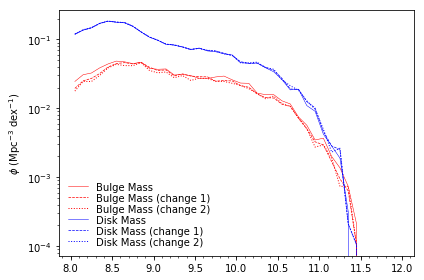

In [22]:
binwidth = 0.1

ax0 = plt.subplot2grid((1,1), (0,0))
divider = make_axes_locatable(ax0) 
#ax1 = divider.append_axes("bottom", size="50%", pad=0.3)

mi = 8
ma = 12
NB = int((ma - mi) / binwidth)

(b1_counts, b1_binedges) = np.histogram(np.log10(BulgeMass1), range=(mi, ma), bins=NB)
(b2_counts, b2_binedges) = np.histogram(np.log10(BulgeMass2), range=(mi, ma), bins=NB)
(b3_counts, b3_binedges) = np.histogram(np.log10(BulgeMass3), range=(mi, ma), bins=NB)
(d1_counts, d1_binedges) = np.histogram(np.log10(DiskMass1), range=(mi, ma), bins=NB)
(d2_counts, d2_binedges) = np.histogram(np.log10(DiskMass2), range=(mi, ma), bins=NB)
(d3_counts, d3_binedges) = np.histogram(np.log10(DiskMass3), range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
b1_x = b1_binedges[:-1] + 0.5 * binwidth
b2_x = b2_binedges[:-1] + 0.5 * binwidth
b3_x = b3_binedges[:-1] + 0.5 * binwidth
d1_x = d1_binedges[:-1] + 0.5 * binwidth
d2_x = d2_binedges[:-1] + 0.5 * binwidth
d3_x = b3_binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
ax0.plot(b1_x, b1_counts / (BoxSize*Hubble_h)**3 / binwidth, 'r', label='Bulge Mass', lw=0.5)
ax0.plot(b2_x, b2_counts / (BoxSize*Hubble_h)**3 / binwidth, 'r--', label='Bulge Mass (change 1)', lw=0.7)
ax0.plot(b3_x, b3_counts / (BoxSize*Hubble_h)**3 / binwidth, 'r:', label='Bulge Mass (change 2)', lw=1.0)
ax0.plot(d1_x, d1_counts / (BoxSize*Hubble_h)**3 / binwidth, 'b', label='Disk Mass', lw=0.5)
ax0.plot(d2_x, d2_counts / (BoxSize*Hubble_h)**3 / binwidth, 'b--', label='Disk Mass (change 1)', lw=0.7)
ax0.plot(d3_x, d3_counts / (BoxSize*Hubble_h)**3 / binwidth, 'b:', label='Disk Mass (change 2)', lw=1.0)
#ax0.plot(s1_x, s1_counts / (BoxSize*Hubble_h)**3 / binwidth, 'k', label='Stellar Mass', lw=0.5)
#ax0.plot(s2_x, s2_counts / (BoxSize*Hubble_h)**3 / binwidth, 'k--', label='Stellar Mass (switch on)', lw=0.5)


#plt.plot(mass, label='computed')
#plt.plot(Mass, label='intrinsic')
ax0.set_yscale('log', nonposy='clip')
#plt.axis([8.0, 12.5, 1.0e-6, 1.0e-1])

# Set the x-axis minor ticks
ax0.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax0.set_ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1}$)')  # Set the y...

leg = ax0.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.tight_layout()
plt.savefig('DBMF-2.png')

In [9]:
stellarmass = G_snap.StellarMass * 1.e10 / Hubble_h
w = np.where(G_snap.ColdGas > 0.0)[0]
gasmass = G_snap.ColdGas[w] * 1.e10 / Hubble_h

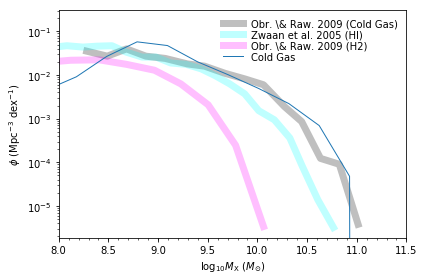

In [15]:
binwidth = 0.3

ax0 = plt.subplot2grid((1,1), (0,0))
divider = make_axes_locatable(ax0) 
#ax1 = divider.append_axes("bottom", size="50%", pad=0.3)

# Baldry+ 2008 modified data used for the MCMC fitting
Zwaan = np.array([[6.933,   -0.333],
            [7.057,   -0.490],
            [7.209,   -0.698],
            [7.365,   -0.667],
            [7.528,   -0.823],
            [7.647,   -0.958],
            [7.809,   -0.917],
            [7.971,   -0.948],
            [8.112,   -0.927],
            [8.263,   -0.917],
            [8.404,   -1.062],
            [8.566,   -1.177],
            [8.707,   -1.177],
            [8.853,   -1.312],
            [9.010,   -1.344],
            [9.161,   -1.448],
            [9.302,   -1.604],
            [9.448,   -1.792],
            [9.599,   -2.021],
            [9.740,   -2.406],
            [9.897,   -2.615],
            [10.053,  -3.031],
            [10.178,  -3.677],
            [10.335,  -4.448],
            [10.492,  -5.083]        ], dtype=np.float32)
        
ObrRaw = np.array([
            [7.300,   -1.104],
            [7.576,   -1.302],
            [7.847,   -1.250],
            [8.133,   -1.240],
            [8.409,   -1.344],
            [8.691,   -1.479],
            [8.956,   -1.792],
            [9.231,   -2.271],
            [9.507,   -3.198],
            [9.788,   -5.062 ]        ], dtype=np.float32)

ObrCold = np.array([
            [8.009,   -1.042],
            [8.215,   -1.156],
            [8.409,   -0.990],
            [8.604,   -1.156],
            [8.799,   -1.208],
            [9.020,   -1.333],
            [9.194,   -1.385],
            [9.404,   -1.552],
            [9.599,   -1.677],
            [9.788,   -1.812],
            [9.999,   -2.312],
            [10.172,  -2.656],
            [10.362,  -3.500],
            [10.551,  -3.635],
            [10.740,  -5.010]        ], dtype=np.float32)

ObrCold_xval = np.log10(10**(ObrCold[:, 0])  /Hubble_h/Hubble_h)
ObrCold_yval = (10**(ObrCold[:, 1]) * Hubble_h*Hubble_h*Hubble_h)
Zwaan_xval = np.log10(10**(Zwaan[:, 0]) /Hubble_h/Hubble_h)
Zwaan_yval = (10**(Zwaan[:, 1]) * Hubble_h*Hubble_h*Hubble_h)
ObrRaw_xval = np.log10(10**(ObrRaw[:, 0])  /Hubble_h/Hubble_h)
ObrRaw_yval = (10**(ObrRaw[:, 1]) * Hubble_h*Hubble_h*Hubble_h)

ax0.plot(ObrCold_xval, ObrCold_yval, color='black', lw = 7, alpha=0.25, label='Obr. \& Raw. 2009 (Cold Gas)')
ax0.plot(Zwaan_xval, Zwaan_yval, color='cyan', lw = 7, alpha=0.25, label='Zwaan et al. 2005 (HI)')
ax0.plot(ObrRaw_xval, ObrRaw_yval, color='magenta', lw = 7, alpha=0.25, label='Obr. \& Raw. 2009 (H2)')
        
mi = np.floor(min(np.log10(gasmass))) - 2
ma = np.floor(max(np.log10(gasmass))) + 2
NB = int((ma - mi) / binwidth)

(g_counts, g_binedges) = np.histogram(np.log10(gasmass), range=(mi, ma), bins=NB)
#(H2_counts, H2_binedges) = np.histogram(np.log10(H2mass), range=(mi, ma), bins=NB)
#(HI_counts, HI_binedges) = np.histogram(np.log10(HImass), range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
g_x = g_binedges[:-1] + 0.5 * binwidth
#H2_x = H2_binedges[:-1] + 0.5 * binwidth
#HI_x = HI_binedges[:-1] + 0.5 * binwidth

# Overplot the model histograms
ax0.plot(g_x, g_counts / (BoxSize/Hubble_h)**3 / binwidth, label='Cold Gas', lw=1.0)
#ax0.plot(H2_x, H2_counts / (BoxSize*Hubble_h)**3 / binwidth, label='H2', lw=1.0)
#ax0.plot(HI_x, HI_counts / (BoxSize*Hubble_h)**3 / binwidth, label='HI', lw=1.0)

#plt.plot(mass, label='computed')
#plt.plot(Mass, label='intrinsic')
ax0.set_yscale('log', nonposy='clip')
#plt.axis([8.0, 12.5, 1.0e-6, 1.0e-1])

# Set the x-axis minor ticks
ax0.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax0.set_ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1}$)')  # Set the y...
ax0.set_xlabel(r'$\log_{10} M_{\mathrm{X}}\ (M_{\odot})$')
ax0.set_xlim(8.0, 11.5)

leg = ax0.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
    
plt.tight_layout()
plt.show()